In [1]:
%pylab inline
import os, csv

Populating the interactive namespace from numpy and matplotlib


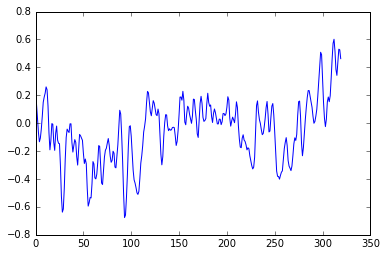

In [2]:
data_to_charge = 0 # 0 is for the music samples, 1 is for TIMIT
if data_to_charge not in (0, 1):
    raise ValueError("data_to_charge must be 0 (music) or 1 (speech)")
elif data_to_charge == 0:
    data_folder = "../sample/"
else:
    data_folder = "../timit"

files_names = (os.listdir(data_folder))
folder_size = len(files_names)
sample_lenght = 0

cr = csv.reader(open(data_folder + files_names[0], "r"))
for row in cr:
    sample_lenght += 1

data = np.zeros((folder_size, sample_lenght, 2))
    
for file_number, file in enumerate(files_names):
    cr = csv.reader(open(data_folder + file, "r"))
    for row_number, row in enumerate(cr):
        data[file_number][row_number] = [float(row[0]), float(row[1])]
        
plot(data[4][:,0])

In [3]:
def sigmoide(x):
    return 1 / (1+ np.exp(-x))

In [5]:
class LSTMNumpy:
    
    def __init__(self, word_dim, hidden_dim=100, bptt_truncate=4):
        # Assign instance variables
        self.word_dim = word_dim
        self.hidden_dim = hidden_dim
        self.bptt_truncate = bptt_truncate
        # Randomly initialize the network parameters
        self.V = np.random.normal(0, 0.1, (word_dim, hidden_dim))
        self.Wc =np.random.normal(0, 0.1, (hidden_dim, hidden_dim))
        self.Wi= np.random.normal(0,0.1, (hidden_dim, hidden_dim))
        self.Wo= np.random.normal(0,0.1, (hidden_dim, hidden_dim))
        self.Wf= np.random.normal(0,0.1, (hidden_dim, hidden_dim))

In [ ]:
def forward_propagation(self, size, initialState):
    # The total number of time steps
    T = size
    # During forward propagation we save all hidden states in s because need them later.
    s = np.zeros((T , self.hidden_dim))
    i = np.zeros((T , self.hidden_dim))
    o = np.zeros((T , self.hidden_dim))
    f = np.zeros((T , self.hidden_dim))
    s[-1] = np.array([initialState] * self.hidden_dim)
    # The outputs at each time step. Again, we save them for later.
    o = np.zeros((T, self.word_dim))
    # For each time step...
    for t in np.arange(T):
        i[t] = sigmoide()
        s[t] = np.tanh(self.W.dot(s[t-1]))
        o[t] = self.V.dot(s[t])
    return [o, s]

LSTMNumpy.forward_propagation = forward_propagation